7 7
Cond
BBF-14 8.36657549114783
BHRF1 7.052896933258577
Cas9 7.517907908602795
EGFR 8.047635732429297
IL-7Ralpha 6.1699315607936205
MBP 7.185338369287753
PD-L1 8.512063847286642
Average 7.5512418725494435
Uncond
BBF-14 8.661304084820088
BHRF1 7.1180774923124694
Cas9 7.54011813756423
EGFR 8.251751382912722
IL-7Ralpha 6.331561572149121
MBP 7.272301070655224
PD-L1 8.471306744106798
Average 7.6648665089132315


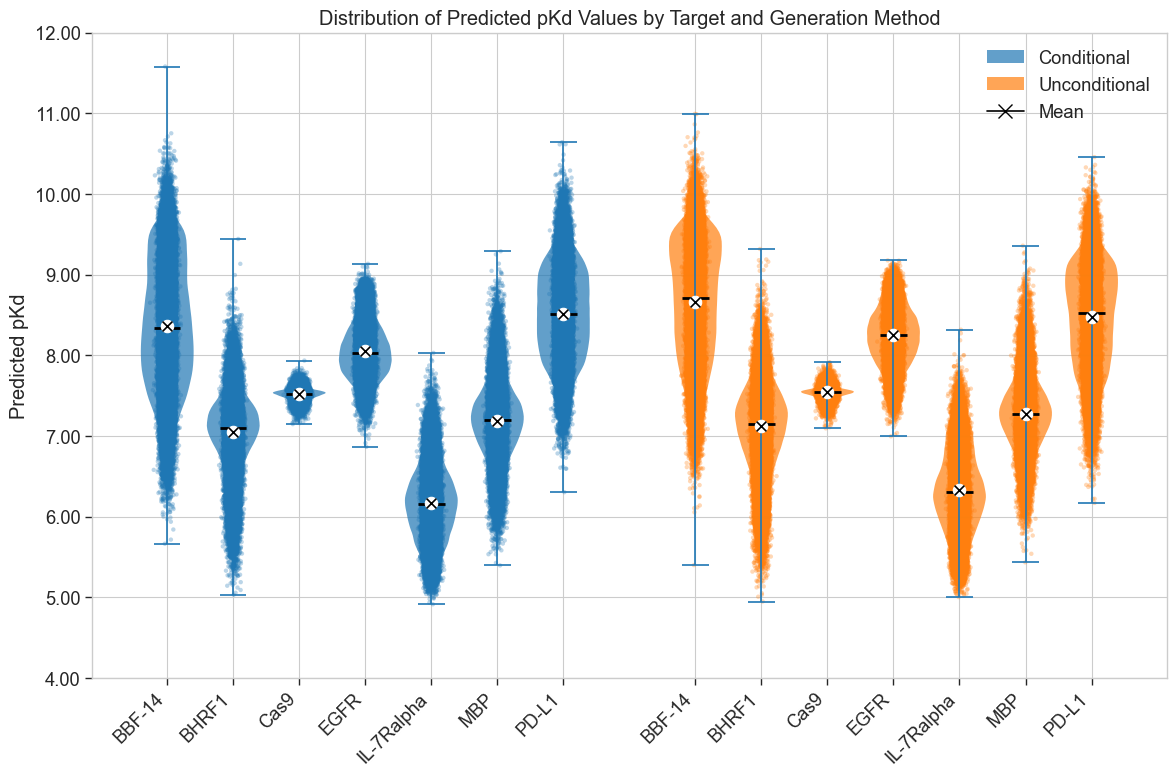

In [33]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob
from matplotlib.ticker import FormatStrFormatter

# Set the style for publication-ready plots
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_context("paper", font_scale=1.5)

# Paths to data
cond = 'results/generated_proteins/cond'
uncond = 'results/generated_proteins/uncond'

# Get CSV files
cond_csvs = glob(f'{cond}/*.csv')
uncond_csvs = glob(f'{uncond}/*.csv')

# Extract names
cond_names = [os.path.basename(csv).split('_')[0] for csv in cond_csvs]
uncond_names = [os.path.basename(csv).split('_')[0] for csv in uncond_csvs]

print(len(cond_csvs), len(uncond_csvs))

# Create dictionaries to store data by target
cond_data = {}
uncond_data = {}

# Process conditional data
print('Cond')
all_cond_ppkds = []
for name, csv in zip(cond_names, cond_csvs):
    df = pd.read_csv(csv)
    ppkds = df['predicted-pKd'].tolist()
    cond_data[name] = ppkds
    all_cond_ppkds.extend(ppkds)
    ppkd = df['predicted-pKd'].mean()
    print(name, ppkd)
print('Average', sum(all_cond_ppkds) / len(all_cond_ppkds))

# Process unconditional data
print('Uncond')
all_uncond_ppkds = []
for name, csv in zip(uncond_names, uncond_csvs):
    df = pd.read_csv(csv)
    ppkds = df['predicted-pKd'].tolist()
    uncond_data[name] = ppkds
    all_uncond_ppkds.extend(ppkds)
    ppkd = df['predicted-pKd'].mean()
    print(name, ppkd)
print('Average', sum(all_uncond_ppkds) / len(all_uncond_ppkds))

# Create figure for plotting
fig, ax = plt.subplots(figsize=(12, 8))

# Plot distributions
positions = []
data_to_plot = []
labels = []
colors = []

# Add conditional data
for i, (name, ppkds) in enumerate(cond_data.items()):
    positions.append(i)
    data_to_plot.append(ppkds)
    labels.append(name)
    colors.append('#1f77b4')  # Blue for conditional

# Add spacing between groups
next_pos = len(cond_data) + 1

# Add unconditional data
for i, (name, ppkds) in enumerate(uncond_data.items()):
    positions.append(next_pos + i)
    data_to_plot.append(ppkds)
    labels.append(name)
    colors.append('#ff7f0e')  # Orange for unconditional

# Create violin plots
parts = ax.violinplot(data_to_plot, positions=positions, widths=0.8, 
                     showmeans=False, showmedians=True, showextrema=True)

# Customize violin plots
for i, pc in enumerate(parts['bodies']):
    pc.set_facecolor(colors[i])
    pc.set_alpha(0.7)

# Set median lines to black
parts['cmedians'].set_color('black')
parts['cmedians'].set_linewidth(2)

# Add individual data points
for i, d in enumerate(data_to_plot):
    y = d
    x = np.random.normal(positions[i], 0.05, size=len(y))
    ax.scatter(x, y, s=10, alpha=0.3, c=colors[i], edgecolor='none')

# Add mean markers
for i, d in enumerate(data_to_plot):
    ax.scatter(positions[i], np.mean(d), marker='o', color='white', s=80, zorder=3)
    ax.scatter(positions[i], np.mean(d), marker='x', color='black', s=50, zorder=4)

# Customize plot
ax.set_xticks(positions)
ax.set_xticklabels(labels, rotation=45, ha='right')
ax.set_ylabel('Predicted pKd')
ax.set_title('Distribution of Predicted pKd Values by Target and Generation Method')
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))

# Set y-axis limits to zoom in between 4 and 12
ax.set_ylim(4, 12)

# Add legend
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='#1f77b4', alpha=0.7, label='Conditional'),
    Patch(facecolor='#ff7f0e', alpha=0.7, label='Unconditional'),
    plt.Line2D([0], [0], marker='x', color='black', markerfacecolor='black', 
               markersize=10, label='Mean')
]
ax.legend(handles=legend_elements, loc='upper right')

# Add a horizontal line at y=0
ax.axhline(y=0, color='gray', linestyle='--', alpha=0.5)

# Adjust layout
plt.tight_layout()
plt.savefig('violin_plot.png', dpi=300)
plt.show()


In [1]:
from models.alignment_helpers import analyze_two_seqs

In [2]:
designs = {
    "MHGEFLAQMSARQDPCCVVAGLGSTNWGFWAMQMRTARGQRWRMMSWFRSCMMRTWMMERRLLIMMPQEQEQMCGMLMSLEKDMMGPIYCARAAGEMRGYFEQSGAGM": "9.09910 mask-rate: 0.35, positions: 98-167",
    "LMYYSYLFASGGQGTLVTVSGGGGSSGGVGSMGGGSNILLARSPVILHVSQGEDMSFMERQVQVIGESM": "9.09650 mask-rate: 0.05, positions: 0-241",
    "QVQLQQSGPELVQPSQSLSITCTVSGFSLTNYGVHWWRQSLGKGMEWLGVIWSGGNTDYNTPFTSRLSISRDTSKSQVWLKMNSLHTDDTAIYYCARALTWYDYEFAYWGQGTLVTVSAGGGGSGGGGSGGGGSDILLTQSPVILSVSPGERVSFSCRASSSIGGNIHWYQQRTNGSPKLLIRYASESISGIPSRFSGSGSGTDFTLSINSVFPEDIADYYQQQNNNWPTTFGAGTKLELK": "9.08590 mask-rate: 0.65, positions: 27-124",
    "SLTLAEVHTVRSSLEKEREALLMEWMLPPYDYMFEGHSRAMMEMMTFKLSVFFMMPMLQTRLQSLYYDARYLMYLMEELAESGIGTLAVPVGAVGEM": "9.03360 mask-rate: 0.11, positions: 0-241",
    "QVQGQQSGPGLVQCSQSLWITCTVSGFSLTNMGVFWVRQSPGKMLEWLGVIWSGGNTDYNTPFTSRLSISDDTSSSQVFFKMNSLQTDDTAIYYCARALTYYDYEAAYWGQGTLVTVLAGGGRSGGGGSGGGGSDILLTQSPQILWVSPGERLSFSTRASQSIGTNIHWYQQRTNGSPKLLIRYASESISGGPSRFSGSGSGTDFTLSINIVDPEDIADYYCQWNNNWPTTFGAGTKLELK": "9.01440 mask-rate: 0.05, positions: 0-241",
    "QVQLQQSGPGLVQPSQSLSITCTVSGFSLTNYGVHWVRQSPVKGLEWLKVIWSGGNTDYNKPFTSRLSISRDTSKSQVFFKMNSLQTDDTAIYYCARALTYYDYEDAYWGQGTLVTVSAGGGGSGGGGSGGGGSDILLTQSPVILSVSPGERVSFSCRASQSIGTNIHWYQQRTNCSPGLLIRYASESISGIPSRFSGSGSGTDFTLSINSVDPEDIADYYCQQMNLWPTTFGAGTKLLLK": "9.01400 mask-rate: 0.12, positions: 0-241",
    "QVNLQQSGPQLVMPSQSFSITCTVSGPSLYNYGVHWVRQSPGKGLEWLQVIWSGGNTDYNTVFTSQLSISRDTSKSQVFFKMNSLQTDDTASYYCARALTYYDYETAYWGQGTPVTVSAGGGGSGGGGGGGGGSDILLTCSPVILSVSPGERVSFSLCASQSIGWGIHWYQQRTNGSPKLLIRYASEYISGIPSRFSGSGSWTDFTLSINSVDAEDIADYYCQQNNHWPTTFGAGTKLELM": "9.00690 mask-rate: 0.1, positions: 75-222",
    "SQVFFAMNSLQTDDTAIYYCARYLTYYDYEFAMWGPGTSVTVSAGGGGSGGGGSGGGGSDILLTQSPVILSVSPGERVSFSCRHSQRIGTNIHWYQHRTNGSPKLLIRSASESISGIPSRFSMSGSGTDFTLSINSVDSADIADYYC": "9.00520 mask-rate: 0.05, positions: 0-241",
    "QVQLQQSGPGLVQPSQSLSITCTVSGFSLTNYGVHWVRQSPGKGLEWLGVIWSGGVTDYNTPFTLGLSISRDTSKSQVFFKMQSLQTDDTAIYYCARALTYYDYEFAYWGQGTLVTVSAGGGGSGGGGSGGGGSDILLTQSPVILSVSPGERVSFSCRASQSIGSNIHWYQQRTNGSPKLLIKYASESISGIPSRFSGSGSPTDFTLSINSVKPEDIADYYCQQNNNWPTTFGAGTKLELK": "9.00380 mask-rate: 0.03, positions: 0-241",
    "QVQLQQSGPGLVQPSASLSITCTVSGFSLSNYGVHWVRQSPGKGLEWLGVIWSGGNTDYNTPFTSRLSISRDTSKSQVFFKMLSLQTDDTAIYYCARLLTYYDYEFAYWGQGTLVTVSAGGGGSGGGGSGGGGSDILLTQSPVILSVSPGERVSFSCRALQSIGTNIHWYQQRTNGSPKLLIRYASIKISGIPSRFSGSGSGTDFTLSINSVDPRDIADYYCQQNNNWQTTFGAGTKLELK": "9.00380 mask-rate: 0.03, positions: 0-241",
}
known  = 'QVQLQQSGPGLVQPSQSLSITCTVSGFSLTNYGVHWVRQSPGKGLEWLGVIWSGGNTDYNTPFTSRLSISRDTSKSQVFFKMNSLQTDDTAIYYCARALTYYDYEFAYWGQGTLVTVSAGGGGSGGGGSGGGGSDILLTQSPVILSVSPGERVSFSCRASQSIGTNIHWYQQRTNGSPKLLIRYASESISGIPSRFSGSGSGTDFTLSINSVDPEDIADYYCQQNNNWPTTFGAGTKLELK'

In [3]:
0.05 * len(list(designs.keys())[-1])

12.05

In [4]:
design = 'QVQLVQSGPGLVQPGQTFSITCQVTGFSLSNHNVHWVRQVPGKGFEWIGVYWDGVGTDYHTTFSSRLSISRDIAQGQLYLDMSSLQDDDTAIYYCAYADQGYPYRFQEWGQGTLVTVTAGGDESGPPESGGGASTITLTQSPVIHSVSPGDRVQFSCTASNSIGTNIHWYQQRSNESPKLLIRYASGKETGIPSRYSGEGSGTDFTLIINSVDPTDIAVYYCHQENNWPTIWGAGTKLELK'

analyze_two_seqs(known, design, save_fig='alignment_example.png')


Positive: 86.72%
Score: 0.3970
Label: QVQLQQSGPGLVQPSQSLSITCTVSGFSLTNYGVHWVRQSPGKGLEWLGVIWSGGNTDYNTPFTSRLSISRDTSKSQVFFKMNSLQTDDTAIYYCARALT
Pred : QVQLVQSGPGLVQPGQTFSITCQVTGFSLSNHNVHWVRQVPGKGFEWIGVYWDGVGTDYHTTFSSRLSISRDIAQGQLYLDMSSLQDDDTAIYYCAYADQ
Score: ++++-+++++++++0++0++++-+++++++++0++++++-++++0+++++-+0+-0+++++-++++++++++-++0+++0-+++++-+++++++++-+--

Label: YYDYEFAYWGQGTLVTVSAGGGGSGGGGSGGGGSDILLTQSPVILSVSPGERVSFSCRASQSIGTNIHWYQQRTNGSPKLLIRYASESISGIPSRFSGSG
Pred : GYPYRFQEWGQGTLVTVTAGGDESGPPESGGGASTITLTQSPVIHSVSPGDRVQFSCTASNSIGTNIHWYQQRSNESPKLLIRYASGKETGIPSRYSGEG
Score: -+-+0+--+++++++++++++--++---++++0+-+-+++++++-++++++++0+++-++0++++++++++++++-++++++++++-0-+++++++++0+

Label: SGTDFTLSINSVDPEDIADYYCQQNNNWPTTFGAGTKLELK
Pred : SGTDFTLIINSVDPTDIAVYYCHQENNWPTIWGAGTKLELK
Score: +++++++-++++++-+++-+++0+0+++++-++++++++++

Visualization saved to alignment_example.png


0.3970345963756178

In [10]:
for design, info in designs.items():
    analyze_two_seqs(known, design)



Positive: 21.99%
Score: 0.1672
Label: QVQLQQSGPGLVQPSQSLSITCTVSGFSLTNYGVHWVRQSPGKGLEWLGVIWSGGNTDYNTPFTSRLSISRDTSKSQVFFKMNSLQTDDTAIYYCARALTYYDYEFAYWGQGTLVTVSAGGGGSGGGGSGGGGSDILLTQSPVILSVSPGERVSFSCRASQSIGTNIHWYQQRTNGSPKLLIRYASESISGIPSRFSGSGSGTDFTLSINSVDPEDIADYYCQQNNNWPTTFGAGTKLELK
Pred : -----MHGEFLAQMSARQDPCCVVAGLGSTNWGFWAMQMRTARGQRWRMMSWFRSCMMRTWMMERRLLIMMPQEQEQMCGMLMSLEKDMMGPIYCARAAGEMRGYFEQSGAGM--------------------------------------------------------------------------------------------------------------------------------
Score: -----0-+--+0+-+---0--+0+++00-++++---++0--0++-0+--+-+--0----0--0--++-+----0+0++---+-+++-+--0--+++++-------+---+-+---------------------------------------------------------------------------------------------------------------------------------


Positive: 22.41%
Score: 0.1830
Label: QVQLQQSGPGLVQPSQSLSITCTVSGFSLTNYGVHWVRQSPGKGLEWLGVIWSGGNTDYNTPFTSRLSISRDTSKSQVFFKMNSLQTDDTAIYYCARALTYYDYEFAYWGQGTLVTVSAGGGGSGGGGSGGGGSDILLTQSPVILSVSPGERVSFSCRASQSIGTNIHWYQQRTNGSPKLL

In [3]:
from pprint import pprint


def recursive_to(obj, device):
    if isinstance(obj, torch.Tensor):
        if device == "cpu":
            return obj.cpu()
        try:
            return obj.cuda(device=device, non_blocking=True)
        except RuntimeError:
            return obj.to(device)
    elif isinstance(obj, list):
        return [recursive_to(o, device=device) for o in obj]
    elif isinstance(obj, tuple):
        return tuple(recursive_to(o, device=device) for o in obj)
    elif isinstance(obj, dict):
        return {k: recursive_to(v, device=device) for k, v in obj.items()}

    else:
        return obj


def format_check(args):
    seq_list = args.cond_seq
    cond_position = args.cond_position
    assert len(seq_list) == len(
        cond_position
    ), "The length of cond_seq and cond_position does not match."
    position_list = []
    for pos in cond_position:
        pos = pos.split("-")
        assert (
            len(pos) == 2
        ), "The format of position is illegal, which is not correctly splited by '-'"
        start_pos, end_pos = int(pos[0]), int(pos[1])
        assert end_pos >= start_pos, "The end position is smaller than start position."
        position_list.append((start_pos, end_pos))
    # check if position segment has overlap
    temp_position_list = [pos for tup in position_list for pos in tup]
    for i in range(1, len(temp_position_list) - 2, 2):
        assert (
            temp_position_list[i + 1] > temp_position_list[i]
        ), "The position segment has overlap, which is not supported"
    # check if the length of each position segment and seq segment matches
    for i, (start_pos, end_pos) in enumerate(position_list):
        assert len(seq_list[i]) == (
            end_pos - start_pos + 1
        ), "The length of each position segment and seq segment does not match."
    return seq_list, position_list



def get_initial(num_seqs, length, tokenizer, device):
    seq = ["<mask>"] * length
    seq = ["".join(seq)]
    init_seq = seq * num_seqs
    batch = tokenizer.batch_encode_plus(
        init_seq, add_special_tokens=True, padding="longest", return_tensors="pt"
    )
    batch = {
        "input_ids": batch["input_ids"],
        "input_mask": batch["attention_mask"].bool(),
    }
    # if cond_seq is None:
    #     batch['input_ids'], _ = _full_mask(batch['input_ids'].clone(), collater.alphabet)
    batch = recursive_to(batch, device)
    pprint(batch)
    return batch


In [4]:
model_name = "airkingbd/dplm_150m"
model = DiffusionProteinLanguageModel.from_pretrained(model_name)
tokenizer = model.tokenizer
model = model.eval()
model = model.cuda()

config.json:   0%|          | 0.00/792 [00:00<?, ?B/s]

c:\Users\Logan\AppData\Local\Programs\Python\Python311\Lib\site-packages\huggingface_hub\file_download.py:144: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Logan\.cache\huggingface\hub\models--airkingbd--dplm_150m. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


pytorch_model.bin:   0%|          | 0.00/595M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.13k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/93.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/595M [00:00<?, ?B/s]

In [5]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

batch = get_initial(2, 64, tokenizer, device)
batch['input_ids'][:, 5:20] = tokenizer.encode('A', add_special_tokens=False)[0]
partial_mask = batch["input_ids"].ne(model.mask_id).type_as(batch["input_mask"])
with torch.cuda.amp.autocast():
    outputs = model.generate(
        batch=batch,
        tokenizer=tokenizer,
        max_iter=1,
        sampling_strategy='gumbel_argmax',
        partial_masks=partial_mask,
        disable_resample='False',
        resample_ratio=0.25,
        temperature=1.0,
    )

C:\Users\Logan\AppData\Local\Temp\ipykernel_21180\888801086.py:6: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():


{'input_ids': tensor([[ 0, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32,
         32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32,
         32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32,
         32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32,  2],
        [ 0, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32,
         32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32,
         32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32,
         32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32,  2]], device='cuda:0'),
 'input_mask': tensor([[True, True, True, True, True, True, True, True, True, True, True, True,
         True, True, True, True, True, True, True, True, True, True, True, True,
         True, True, True, True, True, True, True, True, True, True, True, True,
         True, True, True, True, True, True, True, True, True, True, True, True,
         True, True, True,

Decoding: 100%|██████████| 1/1 [00:00<00:00,  3.83it/s]


In [8]:
outputs[0]

tensor([[ 0, 20,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,
          5,  5,  5,  5, 16,  5, 13, 11,  5,  5,  5,  5, 10,  5,  9,  6, 13, 11,
          5,  5, 17,  5, 11,  5, 21,  5, 16, 10,  4, 23,  8,  9,  6,  5, 15,  8,
          8, 12,  5,  9, 16, 14, 14, 23, 11, 14, 18,  2],
        [ 0,  6,  7,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,
          5,  5,  5, 11,  5,  5,  5,  5,  5, 21, 10,  5,  5,  4,  5,  8, 16,  9,
          5,  9, 15,  5,  5,  9, 11,  5,  5, 11,  5,  7,  4, 13,  7,  5, 12,  6,
         19, 11, 10, 22, 22, 15,  6, 15,  8, 23, 12,  2]], device='cuda:0')

In [16]:
tokenizer.decode(outputs[0][0])

'<cls> M A R A A A A A A A A A A A A A A A A A A A A A A A T A A T A F G S T A A F A C S T L S T G R M S A H P E P D T T R R T I Q S V <eos>'

In [3]:
model = AutoModel.from_pretrained('Rostlab/prot_t5_xl_half_uniref50-enc')
sum(p.numel() for p in model.parameters())

config.json:   0%|          | 0.00/656 [00:00<?, ?B/s]

c:\Users\Logan\AppData\Local\Programs\Python\Python311\Lib\site-packages\huggingface_hub\file_download.py:144: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Logan\.cache\huggingface\hub\models--Rostlab--prot_t5_xl_half_uniref50-enc. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


pytorch_model.bin:   0%|          | 0.00/2.42G [00:00<?, ?B/s]

Some weights of T5Model were not initialized from the model checkpoint at Rostlab/prot_t5_xl_half_uniref50-enc and are newly initialized: ['decoder.block.0.layer.0.SelfAttention.k.weight', 'decoder.block.0.layer.0.SelfAttention.o.weight', 'decoder.block.0.layer.0.SelfAttention.q.weight', 'decoder.block.0.layer.0.SelfAttention.relative_attention_bias.weight', 'decoder.block.0.layer.0.SelfAttention.v.weight', 'decoder.block.0.layer.0.layer_norm.weight', 'decoder.block.0.layer.1.EncDecAttention.k.weight', 'decoder.block.0.layer.1.EncDecAttention.o.weight', 'decoder.block.0.layer.1.EncDecAttention.q.weight', 'decoder.block.0.layer.1.EncDecAttention.v.weight', 'decoder.block.0.layer.1.layer_norm.weight', 'decoder.block.0.layer.2.DenseReluDense.wi.weight', 'decoder.block.0.layer.2.DenseReluDense.wo.weight', 'decoder.block.0.layer.2.layer_norm.weight', 'decoder.block.1.layer.0.SelfAttention.k.weight', 'decoder.block.1.layer.0.SelfAttention.o.weight', 'decoder.block.1.layer.0.SelfAttention.q.w

2818830336

In [4]:
sum(p.numel() for p in model.parameters()) // 1e6


2818.0

In [ ]:
import pandas as pd


df = pd.read_csv('evaluation/test_compare_ss_pred.csv')

# Calculate matching characters between natural and generated sequences for SS4
matching_ss4 = 0
total_chars = 0
for true, pred in zip(df['nat-ss4'], df['nat_ss4']):
    # Ensure we only compare up to the length of the shorter string
    min_len = min(len(true), len(pred))
    total_chars += min_len
    # Count matching characters at each position
    for i in range(min_len):
        if true[i] == pred[i]:
            matching_ss4 += 1

print(f"SS4 natural matching characters: {matching_ss4}/{total_chars} ({matching_ss4/total_chars*100:.2f}%)")

# Do the same for SS9
matching_ss9 = 0
total_chars_ss9 = 0
for true, pred in zip(df['nat-ss9'], df['nat_ss9']):
    min_len = min(len(true), len(pred))
    total_chars_ss9 += min_len
    for i in range(min_len):
        if true[i] == pred[i]:
            matching_ss9 += 1

print(f"SS9 natural matching characters: {matching_ss9}/{total_chars_ss9} ({matching_ss9/total_chars_ss9*100:.2f}%)")

matching_ss4_gen = 0
total_chars_ss4_gen = 0
for true, pred in zip(df['gen-ss4'], df['gen_ss4']):
    min_len = min(len(true), len(pred))
    total_chars_ss4_gen += min_len
    for i in range(min_len):
        if true[i] == pred[i]:
            matching_ss4_gen += 1

print(f"SS4 generated matching characters: {matching_ss4_gen}/{total_chars_ss4_gen} ({matching_ss4_gen/total_chars_ss4_gen*100:.2f}%)")

matching_ss9_gen = 0
total_chars_ss9_gen = 0
for true, pred in zip(df['gen-ss9'], df['gen_ss9']):
    min_len = min(len(true), len(pred))
    total_chars_ss9_gen += min_len
    for i in range(min_len):
        if true[i] == pred[i]:
            matching_ss9_gen += 1

print(f"SS9 generated matching characters: {matching_ss9_gen}/{total_chars_ss9_gen} ({matching_ss9_gen/total_chars_ss9_gen*100:.2f}%)")

SS4 natural matching characters: 99967/115123 (86.83%)
SS9 natural matching characters: 89616/115123 (77.84%)
SS4 generated matching characters: 103148/119379 (86.40%)
SS9 generated matching characters: 92314/119379 (77.33%)


In [4]:
data = load_dataset('GleghornLab/SS8')
data

DatasetDict({
    train: Dataset({
        features: ['seqs', 'labels'],
        num_rows: 10792
    })
    valid: Dataset({
        features: ['seqs', 'labels'],
        num_rows: 626
    })
    test: Dataset({
        features: ['seqs', 'labels'],
        num_rows: 50
    })
})

In [6]:
vocab = set()
for label in data['train']['labels']:
    vocab.update(label)
vocab

{'B', 'C', 'D', 'E', 'G', 'H', 'I', 'S', 'T'}

In [5]:
data['train'].to_pandas().to_csv('ss8_train.csv', index=False)

In [3]:
import torch
from safetensors.torch import load_file
from huggingface_hub import hf_hub_download
from models.modeling_esm_diff import ESM_Diff_Binders, ESMDiffConfig
from models.utils import wrap_lora

MODEL_PATH = 'lhallee/esm_diff_bind_150'
base_path = 'GleghornLab/esm_diff_150'

In [15]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

local_weight_file = hf_hub_download(
    repo_id=MODEL_PATH,
    filename='model.safetensors',
    repo_type='model',
)

config = ESMDiffConfig.from_pretrained(MODEL_PATH)
model = ESM_Diff_Binders(config=config)
model = wrap_lora(model, r=config.lora_r, lora_alpha=config.lora_alpha, lora_dropout=config.lora_dropout)
state_dict = load_file(local_weight_file)

# Track which parameters were loaded
loaded_params = set()
missing_params = set()

for name, param in model.named_parameters():
    found = False
    for key in state_dict.keys():
        if key in name:
            param.data = state_dict[key]
            loaded_params.add(name)
            found = True
            break
    if not found:
        missing_params.add(name)

# Verify all weights were loaded correctly
print(f"Loaded {len(loaded_params)} parameters")
print(f"Missing {len(missing_params)} parameters")
if missing_params:
    print("Missing parameters:")
    for param in sorted(missing_params):
        print(f"  - {param}")

# Move model to device
model = model.to(device)
model

Loaded 856 parameters
Missing 0 parameters


LoraModel(
  (model): ESM_Diff_Binders(
    (esm): FAST_ESM_ENCODER(
      (embeddings): EsmEmbeddings(
        (word_embeddings): Embedding(33, 640, padding_idx=1)
      )
      (encoder): EsmEncoder(
        (layer): ModuleList(
          (0-29): 30 x EsmLayer(
            (attention): EsmAttention(
              (self): EsmSelfAttention(
                (query): lora.Linear(
                  (base_layer): Linear(in_features=640, out_features=640, bias=True)
                  (lora_dropout): ModuleDict(
                    (default): Dropout(p=0.01, inplace=False)
                  )
                  (lora_A): ModuleDict(
                    (default): Linear(in_features=640, out_features=8, bias=False)
                  )
                  (lora_B): ModuleDict(
                    (default): Linear(in_features=8, out_features=640, bias=False)
                  )
                  (lora_embedding_A): ParameterDict()
                  (lora_embedding_B): ParameterDict()
            

In [12]:
for key in model.state_dict().keys():
    print(key)

model.esm.embeddings.word_embeddings.weight
model.esm.encoder.layer.0.attention.self.query.base_layer.weight
model.esm.encoder.layer.0.attention.self.query.base_layer.bias
model.esm.encoder.layer.0.attention.self.query.lora_A.default.weight
model.esm.encoder.layer.0.attention.self.query.lora_B.default.weight
model.esm.encoder.layer.0.attention.self.key.base_layer.weight
model.esm.encoder.layer.0.attention.self.key.base_layer.bias
model.esm.encoder.layer.0.attention.self.key.lora_A.default.weight
model.esm.encoder.layer.0.attention.self.key.lora_B.default.weight
model.esm.encoder.layer.0.attention.self.value.base_layer.weight
model.esm.encoder.layer.0.attention.self.value.base_layer.bias
model.esm.encoder.layer.0.attention.self.value.lora_A.default.weight
model.esm.encoder.layer.0.attention.self.value.lora_B.default.weight
model.esm.encoder.layer.0.attention.self.rotary_embeddings.inv_freq
model.esm.encoder.layer.0.attention.output.dense.base_layer.weight
model.esm.encoder.layer.0.atten

In [11]:
for key in state_dict.keys():
    print(key)


esm.contact_head.regression.bias
esm.contact_head.regression.weight
esm.embeddings.word_embeddings.weight
esm.encoder.emb_layer_norm_after.bias
esm.encoder.emb_layer_norm_after.weight
esm.encoder.layer.0.LayerNorm.bias
esm.encoder.layer.0.LayerNorm.weight
esm.encoder.layer.0.attention.LayerNorm.bias
esm.encoder.layer.0.attention.LayerNorm.weight
esm.encoder.layer.0.attention.output.dense.base_layer.bias
esm.encoder.layer.0.attention.output.dense.base_layer.weight
esm.encoder.layer.0.attention.output.dense.lora_A.default.weight
esm.encoder.layer.0.attention.output.dense.lora_B.default.weight
esm.encoder.layer.0.attention.self.key.base_layer.bias
esm.encoder.layer.0.attention.self.key.base_layer.weight
esm.encoder.layer.0.attention.self.key.lora_A.default.weight
esm.encoder.layer.0.attention.self.key.lora_B.default.weight
esm.encoder.layer.0.attention.self.query.base_layer.bias
esm.encoder.layer.0.attention.self.query.base_layer.weight
esm.encoder.layer.0.attention.self.query.lora_A.defa

In [1]:
from transformers import AutoModelForMaskedLM
model = AutoModelForMaskedLM.from_pretrained('Synthyra/ESMplusplus_small', trust_remote_code=True)
tokenizer = model.tokenizer

sequences = ['MPRTEIN', 'MSEQWENCE']
tokenized = tokenizer(sequences, padding=True, return_tensors='pt')

In [4]:
tokenizer.all_special_ids

[2, 3, 1, 0, 32, 31]

In [2]:
subtypes = ['affinity', 'binding']

f'{[subtype for subtype in subtypes]}'

['affinity', 'binding']
